In [31]:
from PIL import Image
from PIL import ImageFilter
from PIL import ImageDraw
from PIL import ImageEnhance
from IPython.display import display
import inspect
print(PIL.__version__)

7.0.0


In [8]:
img = Image.open('/assignment1.png')
print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1200x750 at 0x7FDA3ECC79E8>


In [11]:
inspect.getmro(type(img))

(PIL.PngImagePlugin.PngImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

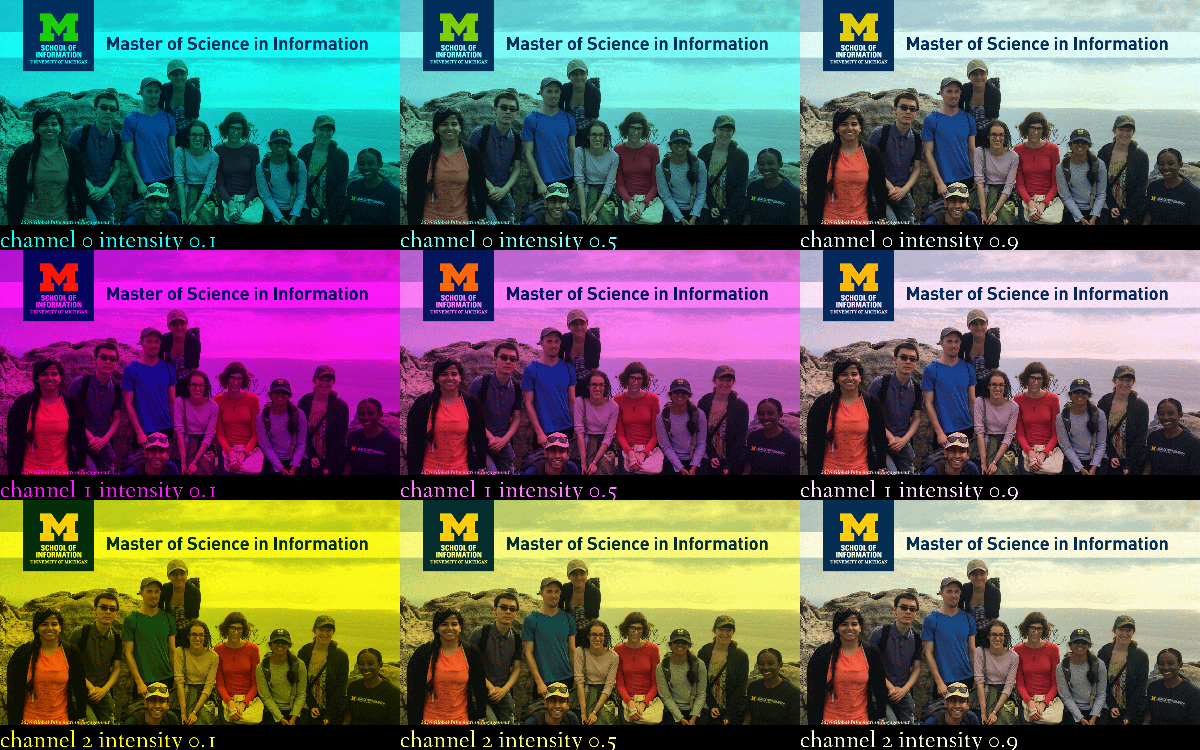

In [14]:
display(img)

In [15]:
img.save('check.gif')

In [19]:
check = Image.open('check.gif')
print(check)
inspect.getmro(type(check))

<PIL.GifImagePlugin.GifImageFile image mode=P size=1200x750 at 0x7FDA3EAA6630>


(PIL.GifImagePlugin.GifImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [21]:
converted_img = img.convert('RGB')

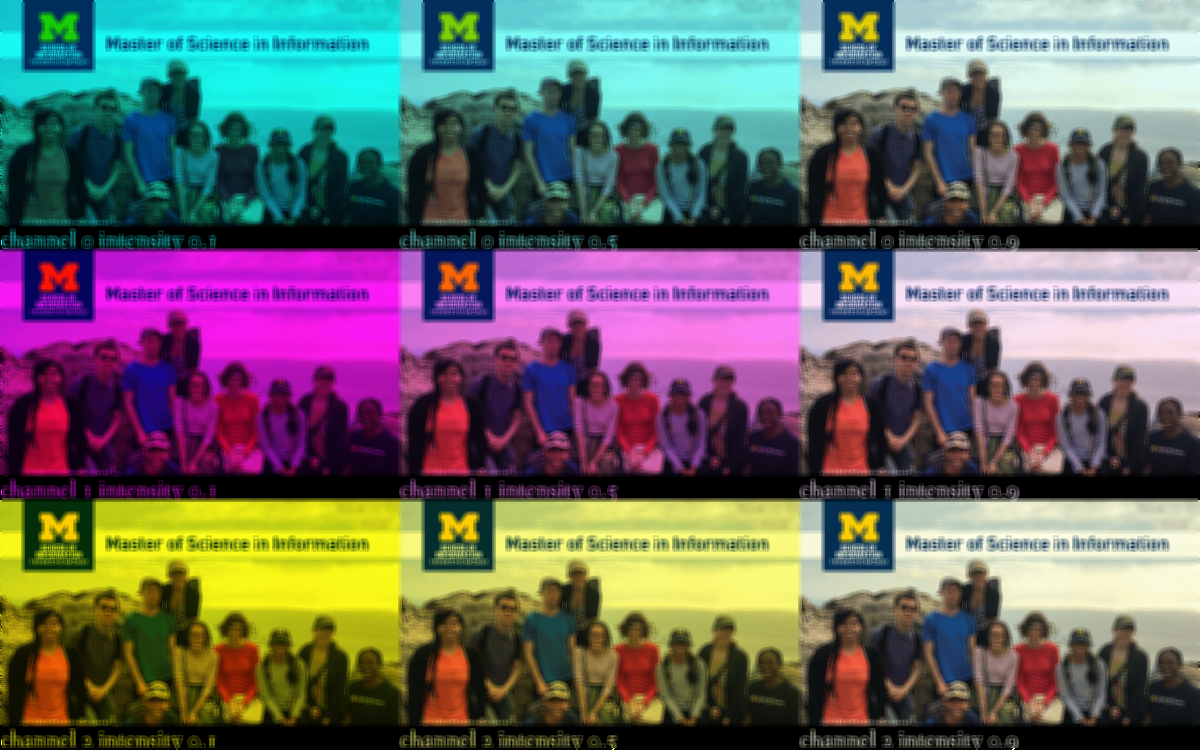

In [23]:
blurred_img = img.filter(ImageFilter.BLUR)
display(blurred_img)

In [24]:
print('{}x{}'.format(img.width, img.height))

1200x750


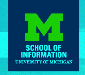

In [27]:
display(img.crop((15, 0, 100, 75)))

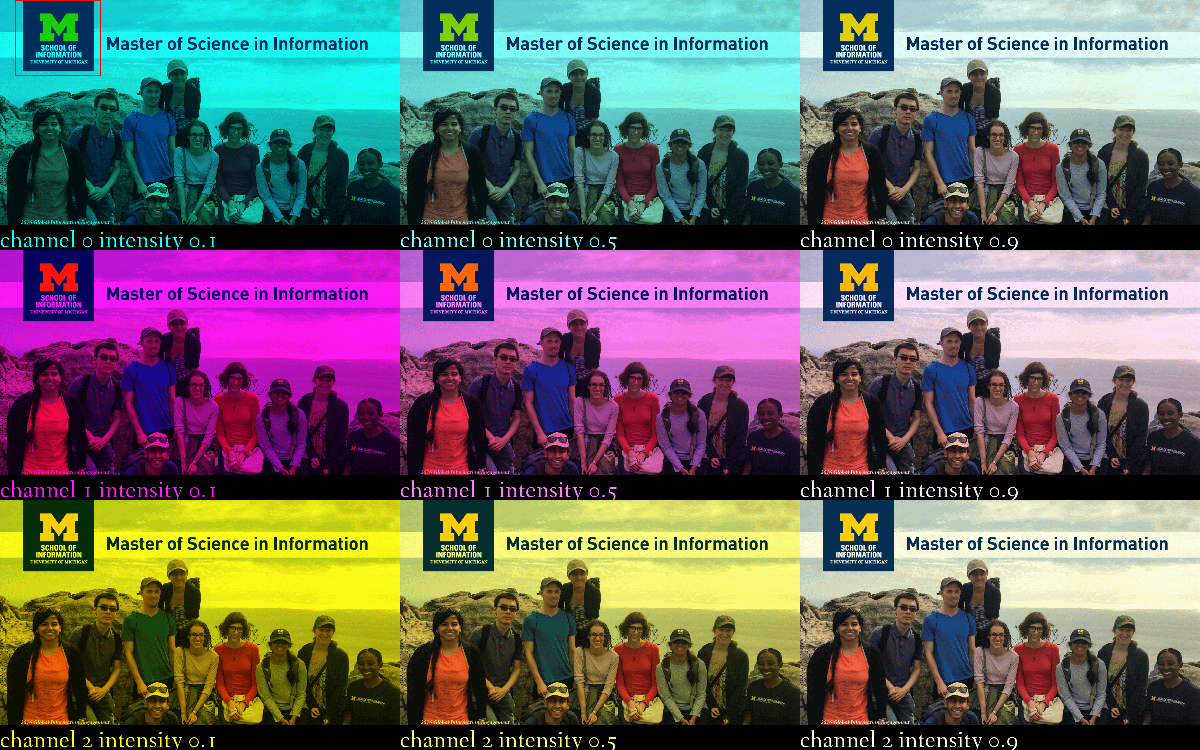

In [30]:
draw_img = ImageDraw.Draw(img)
draw_img.rectangle((15, 0, 100, 75), fill=None, outline='red')
display(img)

In [32]:
enhancer = ImageEnhance.Brightness(img)
images = []
for i in range(0, 10):
  images.append(enhancer.enhance(i/10))
print(images)

[<PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA3551E518>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DBB70>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DB550>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DBA90>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DB358>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DBAC8>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DBDA0>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DBB00>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DB630>, <PIL.Image.Image image mode=RGB size=1200x750 at 0x7FDA354DB9B0>]


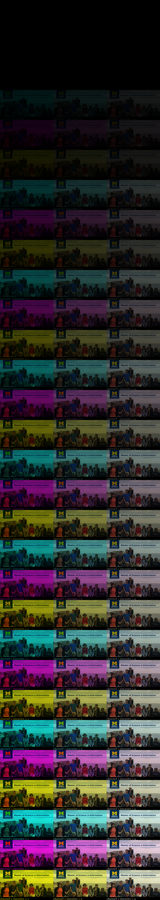

In [36]:
first_image = images[0]
contact_sheet = Image.new(first_image.mode, (first_image.width, 10*first_image.height))

current_location = 0
for image in images:
  contact_sheet.paste(image, (0, current_location))
  current_location = current_location+750

contact_sheet = contact_sheet.resize((160, 900))
display(contact_sheet)

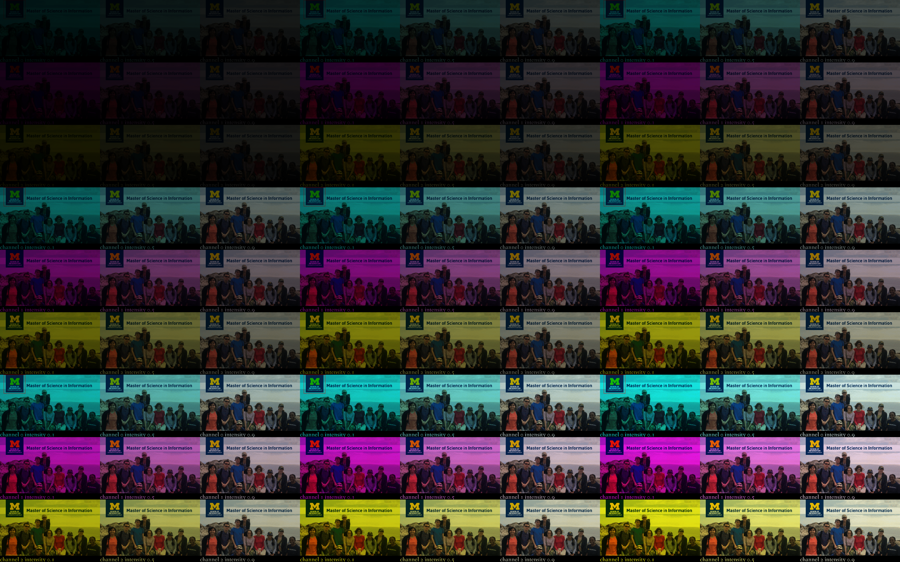

In [38]:
contact_sheet = Image.new(first_image.mode, (3*first_image.width, 3*first_image.height))

x=0
y=0

for image in images[1:]:
  contact_sheet.paste(image, (x,y))
  if x+first_image.width == contact_sheet.width:
    x=0
    y=y+first_image.height
  else:
    x=x+first_image.width

contact_sheet = contact_sheet.resize((int(contact_sheet.width/4), int(contact_sheet.height/4)))
display(contact_sheet)